In [ ]:
#Imports & Global Choices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
#Choosen two flower classes (binary classification)
CLASS_0 = "setosa"       # mapped to label y = 0
CLASS_1 = "virginica"    # mapped to label y = 0

#Choosen two features (input variables for logistic regression)
FEATURES = ["sepal length (cm)","sepal width (cm)"]

In [ ]:
# Force NumPy to always show floats with 1 decimal place
np.set_printoptions(formatter={'float': '{:0.1f}'.format})

#Load Iris Dataset from Scikit-learn
iris = load_iris(as_frame= True) #as_frame = True returns the data in a Pandas Dataframe

#Working Copy so we don't mutate the original
df = iris.frame.copy()   #150 rows * 5 columns

#Convert numeric class IDs (0/1/2) to human-readable names
df["species"] = df["target"].map(lambda i: iris.target_names[i])

#Keep only 2 Classes - i.e setosa and virginica
df_inputs = df["species"].isin([CLASS_0, CLASS_1])

#To generate reduced table containing species and 2 choosen features.
df_bin = df.loc[df_inputs, FEATURES + ["species"]].reset_index(drop=True)

#Extracts the two feature columns as a NumPy array of shape [N, 2].
X_features = df_bin[FEATURES].to_numpy(dtype=float)

#Add bias column at the front -> x = [1,x1,x2]
bias_add = np.ones((X_features.shape[0],1), dtype=float)

X = np.hstack([bias_add, X_features])

#build output y as 0/1 labels
y = (df_bin["species"].to_numpy() == CLASS_1).astype(int).reshape(-1, 1)

print("Chosen FEATURES:", FEATURES)
print("Class mapping: y=0 ->", CLASS_0, " | y=1 ->", CLASS_1)
print(X)
#dimension
print("Shapes -> X:", X.shape, "  y:", y.shape)


Chosen FEATURES: ['sepal length (cm)', 'sepal width (cm)']
Class mapping: y=0 -> setosa  | y=1 -> virginica
[[1.0 5.1 3.5]
 [1.0 4.9 3.0]
 [1.0 4.7 3.2]
 [1.0 4.6 3.1]
 [1.0 5.0 3.6]
 [1.0 5.4 3.9]
 [1.0 4.6 3.4]
 [1.0 5.0 3.4]
 [1.0 4.4 2.9]
 [1.0 4.9 3.1]
 [1.0 5.4 3.7]
 [1.0 4.8 3.4]
 [1.0 4.8 3.0]
 [1.0 4.3 3.0]
 [1.0 5.8 4.0]
 [1.0 5.7 4.4]
 [1.0 5.4 3.9]
 [1.0 5.1 3.5]
 [1.0 5.7 3.8]
 [1.0 5.1 3.8]
 [1.0 5.4 3.4]
 [1.0 5.1 3.7]
 [1.0 4.6 3.6]
 [1.0 5.1 3.3]
 [1.0 4.8 3.4]
 [1.0 5.0 3.0]
 [1.0 5.0 3.4]
 [1.0 5.2 3.5]
 [1.0 5.2 3.4]
 [1.0 4.7 3.2]
 [1.0 4.8 3.1]
 [1.0 5.4 3.4]
 [1.0 5.2 4.1]
 [1.0 5.5 4.2]
 [1.0 4.9 3.1]
 [1.0 5.0 3.2]
 [1.0 5.5 3.5]
 [1.0 4.9 3.6]
 [1.0 4.4 3.0]
 [1.0 5.1 3.4]
 [1.0 5.0 3.5]
 [1.0 4.5 2.3]
 [1.0 4.4 3.2]
 [1.0 5.0 3.5]
 [1.0 5.1 3.8]
 [1.0 4.8 3.0]
 [1.0 5.1 3.8]
 [1.0 4.6 3.2]
 [1.0 5.3 3.7]
 [1.0 5.0 3.3]
 [1.0 6.3 3.3]
 [1.0 5.8 2.7]
 [1.0 7.1 3.0]
 [1.0 6.3 2.9]
 [1.0 6.5 3.0]
 [1.0 7.6 3.0]
 [1.0 4.9 2.5]
 [1.0 7.3 2.9]
 [1.0 6.7 2.5]
 [1.0 7

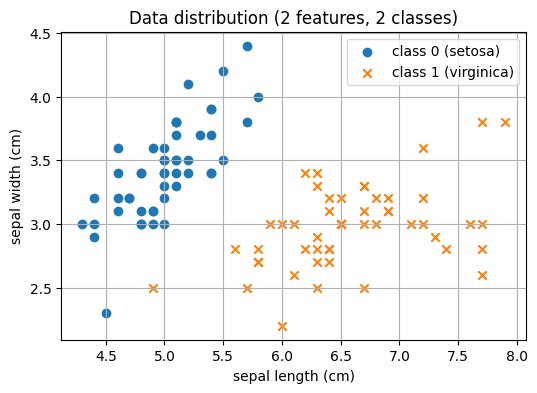

In [ ]:
#Plot I/O data distribution

#Takes column index 1 from X.
x1 = X[:, 1]

#Takes column index 2 from X.
x2 = X[:, 2]

labels = y.flatten()

#build 2 boolean arrays to pick rows for class 0 and class 1
df_inputs0 = (labels == 0)
df_inputs1 = (labels == 1)

#plot the graph
plt.figure(figsize=(6, 4))
plt.scatter(x1[df_inputs0], x2[df_inputs0], marker='o', label=f"class 0 ({CLASS_0})")
plt.scatter(x1[df_inputs1], x2[df_inputs1], marker='x', label=f"class 1 ({CLASS_1})")

plt.xlabel(FEATURES[0])
plt.ylabel(FEATURES[1])
plt.title("Data distribution (2 features, 2 classes)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# used sklearn's splitter with stratification to preserve class balance (~50/50)
# test_size=0.20 -> 20% test, 80% train
# random_state=42 -> reproducible split
# stratify=y -> keeps class proportions the same in both splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# ---- sanity prints (same style as before) ----
print("Shapes after split:")
print("X_train:", X_train.shape, " y_train:", y_train.shape)
print("X_test :", X_test.shape,  " y_test :", y_test.shape)

# helper function to count class 0/1 and show percentages
def counts(yv):
    vals, cnts = np.unique(yv, return_counts=True)
    d = {int(v): int(c) for v, c in zip(vals, cnts)}
    return d.get(0,0), d.get(1,0)

# compute counts and percentages for train/test
c0t, c1t = counts(y_train.flatten())
c0e, c1e = counts(y_test.flatten())
mt, me = len(y_train), len(y_test)

print(f"Train: total={mt} | 0:{c0t} 1:{c1t} | %0={c0t/mt:.2%} %1={c1t/mt:.2%}")
print(f"Test : total={me} | 0:{c0e} 1:{c1e} | %0={c0e/me:.2%} %1={c1e/me:.2%}")

Shapes after split:
X_train: (80, 3)  y_train: (80, 1)
X_test : (20, 3)  y_test : (20, 1)
Train: total=80 | 0:40 1:40 | %0=50.00% %1=50.00%
Test : total=20 | 0:10 1:10 | %0=50.00% %1=50.00%


In [ ]:
#Training hyperparameters
EPOCHS = 3000
ALPHA  = 0.05
PRINT_EVERY = 500
SEED = 42

# initialize theta small random values (shape [3,1] for [theta0, theta1, theta2])
rng = np.random.default_rng(SEED)
theta = rng.normal(loc=0.0, scale=0.01, size=(3,1))

m = len(y_train)
cost_history = []
train_acc_history = []

for epoch in range(1, EPOCHS + 1):
    # 1. Compute linear score z = X·theta
    z = X_train @ theta

    # 2. Apply sigmoid: h = 1/(1+exp(-z))
    z = np.clip(z, -500, 500)       # prevent overflow

    h = 1.0 / (1.0 + np.exp(-z))    # predictions in [0,1]

    # 3. Compute cost function (binary cross-entropy)
    eps = 1e-12                     # to avoid log(0)
    J = -(1.0/m) * np.sum(y_train*np.log(h+eps) + (1-y_train)*np.log(1-h+eps))

    # 4. Compute gradient: (1/m) * X^T (h - y)
    grad = (1.0/m) * (X_train.T @ (h - y_train))

    # 5. Update parameters: θ := θ - α * grad
    theta = theta - ALPHA * grad

    # 6. Compute accuracy on training set
    yhat_train = (h >= 0.5).astype(int)        # predictions 0/1
    acc_train = (y_train.flatten() == yhat_train.flatten()).mean()

    # 7. Track cost and accuracy
    cost_history.append(J)
    train_acc_history.append(acc_train)

    # 8. Print occasionally
    if epoch == 1 or epoch % PRINT_EVERY == 0 or epoch == EPOCHS:
        print(f"Epoch {epoch:4d} | J(train)={J:.4f} | Acc(train)={acc_train*100:.2f}%")

print("\nFinal theta values:")
print(f"theta0 (bias)                = {theta[0,0]:.6f}")
print(f"theta1 ({FEATURES[0]})       = {theta[1,0]:.6f}")
print(f"theta2 ({FEATURES[1]})       = {theta[2,0]:.6f}")




Epoch    1 | J(train)=0.6984 | Acc(train)=50.00%
Epoch  500 | J(train)=0.1826 | Acc(train)=98.75%
Epoch 1000 | J(train)=0.1200 | Acc(train)=98.75%
Epoch 1500 | J(train)=0.0949 | Acc(train)=98.75%
Epoch 2000 | J(train)=0.0811 | Acc(train)=98.75%
Epoch 2500 | J(train)=0.0723 | Acc(train)=98.75%
Epoch 3000 | J(train)=0.0660 | Acc(train)=98.75%

Final theta values:
theta0 (bias)                = -1.684900
theta1 (sepal length (cm))       = 3.394740
theta2 (sepal width (cm))       = -5.524092


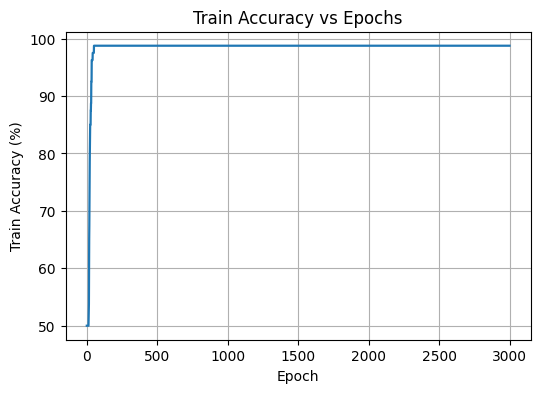

In [ ]:
# create a new figure with width=6, height=4
plt.figure(figsize=(6,4))

# plot epochs vs accuracy (%)
plt.plot(np.arange(1, EPOCHS+1), np.array(train_acc_history)*100, linewidth=1.6)

# label x-axis
plt.xlabel("Epoch")

# label y-axis
plt.ylabel("Train Accuracy (%)")

# add title
plt.title("Train Accuracy vs Epochs")

# display the plot
plt.grid(True)
plt.show()

In [ ]:
#Step 8: Evaluate on TEST set

# 1. Compute z = X_test · theta
z_test = X_test @ theta

# 2. Apply sigmoid
z_test = np.clip(z_test, -500, 500)          # prevent overflow
h_test = 1.0 / (1.0 + np.exp(-z_test))       # probabilities in [0,1]

# 3. Predict class labels using threshold 0.5
yhat_test = (h_test >= 0.5).astype(int)

# 4. Compute test accuracy
test_acc = (y_test.flatten() == yhat_test.flatten()).mean()
print(f"Test Accuracy = {test_acc*100:.2f}%")

# 5. Compute confusion matrix counts
tp = int(np.sum((y_test==1) & (yhat_test==1)))  # True Positive
tn = int(np.sum((y_test==0) & (yhat_test==0)))  # True Negative
fp = int(np.sum((y_test==0) & (yhat_test==1)))  # False Positive
fn = int(np.sum((y_test==1) & (yhat_test==0)))  # False Negative

print(f"TP={tp}  TN={tn}  FP={fp}  FN={fn}")


Test Accuracy = 100.00%
TP=10  TN=10  FP=0  FN=0
